In [47]:
import numpy as np
import missingno as mn
import pandas as pd

In [48]:
# data = pd.read_csv('Training_dataset_Original.csv', low_memory=False)
data = pd.read_csv('Leaderboard_dataset.csv', low_memory=False)

In [49]:
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,350053,1753,0.5001,0.000,0.0,0.0,206,19179,206,14221,...,1,0,missing,20.551,0.42105,3,0.85661,na,0,L
1,350054,1894,1.9701,0.000,0.0,0.0,297,19820,19820,176895,...,3,0,missing,63.047,0,15,0.94391,0,0,C
2,350055,1774,0.1718,0.000,0.0,0.0,197,2563,877,8869,...,1,0,missing,83.797,0.33333,3,0.76467,0,0,C
3,350056,1586,0.1123,5.299,0.0,0.0,missing,missing,missing,missing,...,1,na,missing,missing,1.5,0,NaN,na,na,C
4,350057,1832,1.4442,0.000,0.0,0.0,179,7577,179,21059,...,3,0,96.052,66.665,0,23,0.79190,0,0,L


In [50]:
data = data.replace("nan", np.nan)
data = data.replace("missing", np.nan)
data = data.replace("na", np.nan)

In [40]:
def draw_missing_data_row(data):
    total = data.isnull().sum(axis=1).sort_values(ascending=False)
    percent = (data.isnull().sum(axis=1)/data.isnull().count(axis=1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [41]:
missing = draw_missing_data_row(data)

In [42]:
print(missing)

       Total   Percent
11557     44  0.916667
8908      44  0.916667
24087     44  0.916667
2686      44  0.916667
6531      44  0.916667
15478     44  0.916667
12197     44  0.916667
14713     44  0.916667
12754     44  0.916667
16581     44  0.916667
3480      44  0.916667
14766     44  0.916667
11473     44  0.916667
19038     44  0.916667
11263     44  0.916667
19114     44  0.916667
6094      44  0.916667
7797      44  0.916667
11285     44  0.916667
5786      44  0.916667
3364      44  0.916667
7607      44  0.916667
7552      43  0.895833
7199      43  0.895833
8263      43  0.895833
14630     43  0.895833
19900     43  0.895833
23176     43  0.895833
15659     43  0.895833
12815     43  0.895833
...      ...       ...
1779       0  0.000000
1127       0  0.000000
24461      0  0.000000
22764      0  0.000000
460        0  0.000000
12613      0  0.000000
2831       0  0.000000
12927      0  0.000000
2637       0  0.000000
11304      0  0.000000
10921      0  0.000000
16129      

In [43]:
missing.values[17017] #Found 17017 by hit and trial to find an entry above which more than 25% data is missing

array([5.        , 0.10416667])

In [44]:
delrows = list((missing.index)[:17017])
data = data.drop(delrows)
data.shape

(7983, 48)

In [45]:
draw_missing_data_row(data)

,Total,Percent
0,5,0.104167
9865,5,0.104167
9902,5,0.104167
9897,5,0.104167
9894,5,0.104167
9886,5,0.104167
20598,5,0.104167
20599,5,0.104167
9885,5,0.104167
20612,5,0.104167


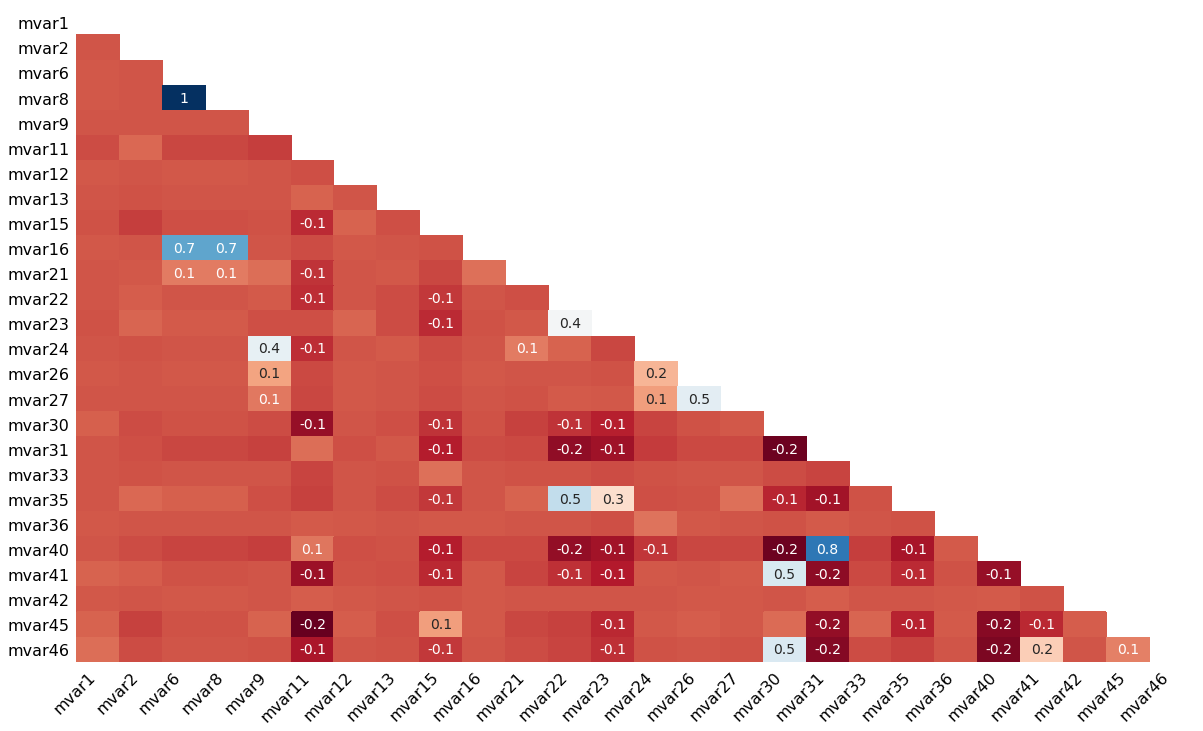

In [46]:
mn.heatmap(data)

In [51]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [52]:
(draw_missing_data_table(data))[:12]

,Total,Percent
mvar40,19542,0.78168
mvar31,17637,0.70548
mvar41,17252,0.69008
mvar11,14026,0.56104
mvar45,13973,0.55892
mvar23,12641,0.50564
mvar30,11449,0.45796
mvar35,10213,0.40852
mvar15,10051,0.40204
mvar22,9081,0.36324


In [53]:
def RemoveCols(data):
    data.drop('application_key', axis=1, inplace=True)
    data.drop('mvar40', axis=1, inplace=True)
    data.drop('mvar31', axis=1, inplace=True)
    data.drop('mvar11', axis=1, inplace=True)
    data.drop('mvar41', axis=1, inplace=True)
    data.drop('mvar45', axis=1, inplace=True)
    data.drop('mvar30', axis=1, inplace=True)
    data.drop('mvar23', axis=1, inplace=True)
    data.drop('mvar15', axis=1, inplace=True)
    
    data.drop('mvar35', axis=1, inplace=True)    
    data.drop('mvar22', axis=1, inplace=True)
    return data

In [54]:
def process(data):
#     mn.dendrogram(data)
#     mn.heatmap(data)
#     mn.bar(data)
#     mn.matrix(data)
    # data.mean(skipna = True)
    # data['mvar1'].mean(skipna = True)
    # data.median()
    data['mvar47'] = data['mvar47'] == 'C'
#     data['mvar47'].head()
    data = RemoveCols(data)
    
    data = data.astype(dtype='float64')
    data = data.fillna(data.median())
    return data

In [55]:
print(data)
data = process(data)

       application_key mvar1    mvar2   mvar3    mvar4  mvar5  mvar6  mvar7  \
0               350053  1753   0.5001   0.000   0.0000  0.000    206  19179   
1               350054  1894   1.9701   0.000   0.0000  0.000    297  19820   
2               350055  1774   0.1718   0.000   0.0000  0.000    197   2563   
3               350056  1586   0.1123   5.299   0.0000  0.000    NaN    NaN   
4               350057  1832   1.4442   0.000   0.0000  0.000    179   7577   
5               350058  1838   0.0544   0.241   0.0000  0.000    882  14039   
6               350059  1743   1.0753   0.272   0.0000  0.000    397  16141   
7               350060  1935   0.5601   0.000   0.0000  0.000    496  44919   
8               350061  1885   0.0811   0.000   0.0000  0.000   7369  19264   
9               350062  1730   0.7444   0.000   0.0000  0.000      0   2103   
10              350063  1731   0.5097   0.000   0.0000  0.000   2433   8673   
11              350064  1755   0.3013   0.000   0.00

In [56]:
print(data.head())

   application_key   mvar1   mvar2  mvar3  mvar4  mvar5  mvar6    mvar7  \
0         350053.0  1753.0  0.5001  0.000    0.0    0.0  206.0  19179.0   
1         350054.0  1894.0  1.9701  0.000    0.0    0.0  297.0  19820.0   
2         350055.0  1774.0  0.1718  0.000    0.0    0.0  197.0   2563.0   
3         350056.0  1586.0  0.1123  5.299    0.0    0.0  297.0   7011.5   
4         350057.0  1832.0  1.4442  0.000    0.0    0.0  179.0   7577.0   

     mvar8     mvar9   ...    mvar35  mvar36  mvar37  mvar38  mvar39   mvar42  \
0    206.0   14221.0   ...       0.0     3.0    11.0     1.0     0.0  0.42105   
1  19820.0  176895.0   ...       0.0     3.0    12.0     3.0     0.0  0.00000   
2    877.0    8869.0   ...       0.0     3.0     4.0     1.0     0.0  0.33333   
3   2503.0   14072.0   ...       0.0     1.0     0.0     1.0     0.0  1.50000   
4    179.0   21059.0   ...       0.0    17.0     0.0     3.0     0.0  0.00000   

   mvar43   mvar44  mvar46  mvar47  
0     3.0  0.85661     0.

In [57]:
data.to_csv('refined_leaderboard_data_2.csv', index = False)